# Table of Contents
 <p><div class="lev3 toc-item"><a href="#Define-all-dataframes" data-toc-modified-id="Define-all-dataframes-001"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Define all dataframes</a></div><div class="lev1 toc-item"><a href="#Nutrient-info" data-toc-modified-id="Nutrient-info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Nutrient info</a></div><div class="lev1 toc-item"><a href="#Ingredient-info" data-toc-modified-id="Ingredient-info-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ingredient info</a></div><div class="lev1 toc-item"><a href="#Info" data-toc-modified-id="Info-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Info</a></div><div class="lev1 toc-item"><a href="#combining-all-df" data-toc-modified-id="combining-all-df-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>combining all df</a></div><div class="lev1 toc-item"><a href="#Nutriscore-Calculation" data-toc-modified-id="Nutriscore-Calculation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nutriscore Calculation</a></div><div class="lev2 toc-item"><a href="#Part-1" data-toc-modified-id="Part-1-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Part 1</a></div><div class="lev3 toc-item"><a href="#Points-A" data-toc-modified-id="Points-A-511"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Points A</a></div><div class="lev3 toc-item"><a href="#Points-C" data-toc-modified-id="Points-C-512"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Points C</a></div><div class="lev2 toc-item"><a href="#Part-2" data-toc-modified-id="Part-2-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Part 2</a></div><div class="lev2 toc-item"><a href="#saving-nutriscore\score" data-toc-modified-id="saving-nutriscore\score-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>saving nutriscore\score</a></div><div class="lev1 toc-item"><a href="#Statistics" data-toc-modified-id="Statistics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Statistics</a></div><div class="lev2 toc-item"><a href="#score-stats" data-toc-modified-id="score-stats-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>score stats</a></div><div class="lev2 toc-item"><a href="#nutri-score-stats" data-toc-modified-id="nutri-score-stats-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>nutri-score stats</a></div>

In [3]:
import numpy
import pandas as pd

### Define all dataframes

In [6]:
# Nutrients
nutrients_df = pd.read_json('../nutriscore_calculation/dNutrients.json', convert_dates=False, convert_axes=False)
nutrients_df = nutrients_df.transpose()

# Info
info_df = pd.read_json('../nutriscore_calculation/dInfo.json', convert_dates=False, convert_axes=False) 
info_df = info_df.transpose()

# Ingredients
ingredients_df = pd.read_json('../nutriscore_calculation/dIngredients.json', convert_dates=False, convert_axes=False) 
ingredients_df = ingredients_df.transpose()

# Nutrient info

In [7]:
columns_nutri = set(nutrients_df.index.values)
len(columns_nutri)

21580

In [8]:
nutrients_df.head()

,id,name,nutrients
0011210006508,10117,{'de': 'Mc. Ilhenny Co. Avery Island L.A. Taba...,{}
0011210115224,4432,"{'de': 'Tabasco Pepper Sauce', 'it': 'Tabasco ...",{}
0012086314018,9625,"{'de': 'Joseph Droukin Montagny', 'it': 'Josep...",{}
0014100096986,2060,{'de': 'Chocolate Chunk : Dark Double Chocolat...,"{'energy_kcal': {'per_day': 7.0, 'per_hundred'..."
0014100096993,3542,{'de': 'Pepperidge farm Cookies aux morceaux d...,"{'energy_kcal': {'per_day': 7.0, 'per_hundred'..."


In [9]:
# Test if particular nutrients exist in the nutrient list
for column in columns_nutri:
    nutris = set(nutrients_df['nutrients'][column].keys())
    if('saturated_fat' in nutris and info_df['unit'][column]):
        print('jai ho', column)
        break

jai ho 4104420045866


In [10]:
nutrients_df['nutrients']['7610029176308']


{'carbohydrates': {'per_day': 31.0,
  'per_hundred': None,
  'per_portion': 38.0,
  'unit': 'g'},
 'energy': {'per_day': 8.0,
  'per_hundred': None,
  'per_portion': 280.0,
  'unit': 'kJ'},
 'energy_kcal': {'per_day': 0.0,
  'per_hundred': None,
  'per_portion': 65.0,
  'unit': 'kCal'},
 'fat': {'per_day': 0.0, 'per_hundred': None, 'per_portion': 0.0, 'unit': 'g'},
 'fiber': {'per_day': None,
  'per_hundred': None,
  'per_portion': 4.0,
  'unit': 'g'},
 'protein': {'per_day': 3.0,
  'per_hundred': None,
  'per_portion': 1.5,
  'unit': 'g'},
 'salt': {'per_day': 0.0,
  'per_hundred': None,
  'per_portion': 0.0,
  'unit': 'g'},
 'saturated_fat': {'per_day': 15.0,
  'per_hundred': None,
  'per_portion': 0.0,
  'unit': 'g'},
 'sugars': {'per_day': None,
  'per_hundred': None,
  'per_portion': 28.0,
  'unit': 'g'}}

# Ingredient info

In [11]:
ingredients_df.head()

,id,ingredients,name
0011210006508,10117,"{'de': 'Weissweinessig, Habanero Chili, Rohrzu...",{'de': 'Mc. Ilhenny Co. Avery Island L.A. Taba...
0011210115224,4432,"{'de': 'Branntweinessig, rote Chilischoten, Ko...","{'de': 'Tabasco Pepper Sauce', 'it': 'Tabasco ..."
0012086314018,9625,"{'de': 'Sulfite', 'en': 'sulphites'}","{'de': 'Joseph Droukin Montagny', 'it': 'Josep..."
0014100096986,2060,{},{'de': 'Chocolate Chunk : Dark Double Chocolat...
0014100096993,3542,"{'de': 'ANGEREICHERTES WEIZENMEHL (MEHL, NIACI...",{'de': 'Pepperidge farm Cookies aux morceaux d...


In [12]:
columns_ingri = set(ingredients_df.index.values)
len(columns_ingri)

21580

In [13]:
# Sanity check
if(columns_ingri == columns_nutri):
    print('1')
    columns = list(columns_ingri)

1


In [14]:
ingredients_df['ingredients'][list(columns_ingri)[27]]

{'de': 'Weichkäse 92%, Panade (Weizenmehl, Sonnenblumenöl, Speck 0.8 (Nitritpökelsalze: E250, E536, Stabilisatoren: E450, E451, E452, E339, Geschmacksverstärker E621, Antioxidationsmittel E316, Aroma), Zwiebel 0.2%, Gewürze (enthält Sellerie), Kochsalz, modifizierte Weizenstärke, Raucharma). ',
 'fr': 'Fromage à pâte molle 92%, panure (farine de blé, huile de tournesol, lard 0.8% (sels nitrités: E250, E536, stabilisants: E450, E451, E452, E339, exhausteur de goût E621, antioxydant E316, arôme), oignon 0.2%, épices (contient du céleri), sel de cuisine, amidon de blé modifié, arôme de fumée). \r\n'}

In [15]:
# Test for languages for ingredients
for column in columns:
    if('fr' in set(ingredients_df['ingredients'][column].keys())):
        ing = ingredients_df['ingredients'][column]['fr']
    elif(len(list(ingredients_df['ingredients'][column].keys())) != 0):
        print('madarchod', column, ingredients_df['ingredients'][column]['de'])
        break

madarchod 4104420045866 Rote Bete* 35%, Sonnenblumenkerne*, Sonnenblumenöl*, Zitronensaft* aus Zitronensaftkonzentrat*, Wasser, Meerrettich* 5%, Rote-Bete-Saftkonzentrat*, Speisesalz, Branntweinessig*, Verdickungsmittel: Guarkernmehl*
*Aus biologischer Landwirtschaft


# Info

In [16]:
info_df['unit'].unique()

array(['g', 'mL'], dtype=object)

In [13]:
info_df.head()

,alcohol,id,name,portion,portion unit,quantity,unit
0011210006508,0,10117,{'de': 'Mc. Ilhenny Co. Avery Island L.A. Taba...,0,g,0,g
0011210115224,0,4432,"{'de': 'Tabasco Pepper Sauce', 'it': 'Tabasco ...",0,g,0,g
0012086314018,0,9625,"{'de': 'Joseph Droukin Montagny', 'it': 'Josep...",0,g,750,mL
0014100096986,0,2060,{'de': 'Chocolate Chunk : Dark Double Chocolat...,28,g,220,g
0014100096993,0,3542,{'de': 'Pepperidge farm Cookies aux morceaux d...,26,g,204,g


# combining all df

In [17]:
df1 = nutrients_df[['name', 'nutrients']]
df2 = ingredients_df[['ingredients']]
df3 = info_df[['alcohol', 'unit']]

In [18]:
df_combined = df1.join(df2, how='inner')
df_combined = df_combined.join(df3, how='inner')

In [19]:
df_combined.head()

,name,nutrients,ingredients,alcohol,unit
0011210006508,{'de': 'Mc. Ilhenny Co. Avery Island L.A. Taba...,{},"{'de': 'Weissweinessig, Habanero Chili, Rohrzu...",0,g
0011210115224,"{'de': 'Tabasco Pepper Sauce', 'it': 'Tabasco ...",{},"{'de': 'Branntweinessig, rote Chilischoten, Ko...",0,g
0012086314018,"{'de': 'Joseph Droukin Montagny', 'it': 'Josep...",{},"{'de': 'Sulfite', 'en': 'sulphites'}",0,mL
0014100096986,{'de': 'Chocolate Chunk : Dark Double Chocolat...,"{'energy_kcal': {'per_day': 7.0, 'per_hundred'...",{},0,g
0014100096993,{'de': 'Pepperidge farm Cookies aux morceaux d...,"{'energy_kcal': {'per_day': 7.0, 'per_hundred'...","{'de': 'ANGEREICHERTES WEIZENMEHL (MEHL, NIACI...",0,g


# Nutriscore Calculation

In [24]:
def build_database():

    a = ['apple', 'avocado', 'banana', 'blackberry', 'cherry', 'chestnut', 'clementine', 'coconut', 'date', 'fig', 'guava', 'grape', 'lemon', 'lime', 'mandarin', 'mango', 'melon', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'walnut', 'strawberry', 'watermelon', 'pomme', 'avocat', 'banane', 'cerise', 'clementine', 'noix de coco', 'figue', 'raisin', 'kiwi', 'citron', 'lime', 'mandarine', 'mangue', 'melon', 'orange', 'papaye', 'poire', 'ananas', 'prune', 'framboise', 'noix', 'pamplemousse', 'noisette', 'asparagus', 'bean', 'broccoli', 'cabbage', 'carrot', 'celery', 'chick pea', 'courgette', 'eggplant', 'endive', 'garlic', 'leek', 'lettuce', 'lentils', 'maize', 'mushroom', 'onion', 'pea', 'pepper', 'pumpkin', 'potato', 'spinach', 'tomato', 'soya bean', 'asperge', 'haricot', 'poivron', 'brocoli', 'chou', 'carotte', 'manioc', 'chou fleur', 'celeri', 'chechi', 'courgette', 'aubergine', 'ail', 'lentille', 'mais', 'champignon', 'ortie', 'petit pois', 'piment', 'citrouille', 'courge', 'tomate', 'soja', 'epinard', 'apfel', 'birne', 'kirche', 'melone', 'traube', 'grapefruit', 'nuss', 'erdnuss', 'walnuss', 'kokosnuss', 'kortoffel', 'gurke', 'radieschen', 'erbse', 'linse', 'brokkoli', 'blumenkohl', 'bohne', 'zucchini', 'zwiebel', 'knoblauch', 'chilli', 'petersilie', 'meerrettich', 'sellerie']

    return a

In [25]:
# from ../nutriscore_calculation/food_db import build_database
f_and_v = build_database()

## Part 1

### Points A

In [26]:
def points_A_not_beverages(barcode):
    a = b = c = d = 0
    nutrients = df_combined['nutrients'][barcode]
    nutris_present = set(nutrients.keys())
    per = 'per_hundred'
    if('energy' in nutris_present):
        if(nutrients['energy']['per_hundred'] is None):
            per = 'per_portion'
            if(nutrients['energy']['per_portion'] <= 335):
                a = 0
            elif(nutrients['energy']['per_portion'] <= 670):
                a = 1
            elif(nutrients['energy']['per_portion'] <= 1005):
                a = 2
            elif(nutrients['energy']['per_portion'] <= 1340):
                a = 3
            elif(nutrients['energy']['per_portion'] <= 1675):
                a = 4
            elif(nutrients['energy']['per_portion'] <= 2010):
                a = 5
            elif(nutrients['energy']['per_portion'] <= 2345):
                a = 6
            elif(nutrients['energy']['per_portion'] <= 2680):
                a = 7
            elif(nutrients['energy']['per_portion'] <= 3015):
                a = 8
            elif(nutrients['energy']['per_portion'] <= 3350):
                a = 9
            else:
                a = 10
        else:
            if(nutrients['energy']['per_hundred'] <= 335):
                a = 0
            elif(nutrients['energy']['per_hundred'] <= 670):
                a = 1
            elif(nutrients['energy']['per_hundred'] <= 1005):
                a = 2
            elif(nutrients['energy']['per_hundred'] <= 1340):
                a = 3
            elif(nutrients['energy']['per_hundred'] <= 1675):
                a = 4
            elif(nutrients['energy']['per_hundred'] <= 2010):
                a = 5
            elif(nutrients['energy']['per_hundred'] <= 2345):
                a = 6
            elif(nutrients['energy']['per_hundred'] <= 2680):
                a = 7
            elif(nutrients['energy']['per_hundred'] <= 3015):
                a = 8
            elif(nutrients['energy']['per_hundred'] <= 3350):
                a = 9
            else:
                a = 10
    else: a = 0
    
    if('sugars' in nutris_present):
        if(nutrients['sugars'][per] <= 4.5):
            b = 0
        elif(nutrients['sugars'][per] <= 9):
            b = 1
        elif(nutrients['sugars'][per] <= 13.5):
            b = 2
        elif(nutrients['sugars'][per] <= 18):
            b = 3
        elif(nutrients['sugars'][per] <= 22.5):
            b = 4
        elif(nutrients['sugars'][per] <= 27):
            b = 5
        elif(nutrients['sugars'][per] <= 31):
            b = 6
        elif(nutrients['sugars'][per] <= 36):
            b = 7
        elif(nutrients['sugars'][per] <= 40):
            b = 8
        elif(nutrients['sugars'][per] <= 45):
            b = 9
        else:
            b = 10
    else: b = 0
    
    if('saturated_fat' in nutris_present):
        if(nutrients['saturated_fat'][per] <= 1):
            c = 0
        elif(nutrients['saturated_fat'][per] <= 2):
            c = 1
        elif(nutrients['saturated_fat'][per] <= 3):
            c = 2
        elif(nutrients['saturated_fat'][per] <= 4):
            c = 3
        elif(nutrients['saturated_fat'][per] <= 5):
            c = 4
        elif(nutrients['saturated_fat'][per] <= 6):
            c = 5
        elif(nutrients['saturated_fat'][per] <= 7):
            c = 6
        elif(nutrients['saturated_fat'][per] <= 8):
            c = 7
        elif(nutrients['saturated_fat'][per] <= 9):
            c = 8
        elif(nutrients['saturated_fat'][per] <= 10):
            c = 9
        else:
            c = 10
    else: c = 0
    
    if('sodium' in nutris_present):
        if(nutrients['sodium'][per] <= 90):
            d = 0
        elif(nutrients['sodium'][per] <= 180):
            d = 1
        elif(nutrients['sodium'][per] <= 270):
            d = 2
        elif(nutrients['sodium'][per] <= 360):
            d = 3
        elif(nutrients['sodium'][per] <= 450):
            d = 4
        elif(nutrients['sodium'][per] <= 540):
            d = 5
        elif(nutrients['sodium'][per] <= 630):
            d = 6
        elif(nutrients['sodium'][per] <= 720):
            d = 7
        elif(nutrients['sodium'][per] <= 810):
            d = 8
        elif(nutrients['sodium'][per] <= 800):
            d = 9
        else:
            d = 10
    else: d = 0
    return a, b, c, d


def points_A_beverages(barcode):
    a = b = c = d = 0
    nutrients = df_combined['nutrients'][barcode]
    nutris_present = set(nutrients.keys())
    per = 'per_hundred'
    if('energy' in nutris_present):
        if(nutrients['energy']['per_hundred'] is None):
            per = 'per_portion'
            if(nutrients['energy']['per_portion'] <= 0):
                a = 0
            elif(nutrients['energy']['per_portion'] <= 30):
                a = 1
            elif(nutrients['energy']['per_portion'] <= 60):
                a = 2
            elif(nutrients['energy']['per_portion'] <= 90):
                a = 3
            elif(nutrients['energy']['per_portion'] <= 120):
                a = 4
            elif(nutrients['energy']['per_portion'] <= 150):
                a = 5
            elif(nutrients['energy']['per_portion'] <= 180):
                a = 6
            elif(nutrients['energy']['per_portion'] <= 210):
                a = 7
            elif(nutrients['energy']['per_portion'] <= 240):
                a = 8
            elif(nutrients['energy']['per_portion'] <= 270):
                a = 9
            else:
                a = 10
        else:
            if(nutrients['energy']['per_hundred'] <= 0):
                a = 0
            elif(nutrients['energy']['per_hundred'] <= 30):
                a = 1
            elif(nutrients['energy']['per_hundred'] <= 60):
                a = 2
            elif(nutrients['energy']['per_hundred'] <= 90):
                a = 3
            elif(nutrients['energy']['per_hundred'] <= 120):
                a = 4
            elif(nutrients['energy']['per_hundred'] <= 150):
                a = 5
            elif(nutrients['energy']['per_hundred'] <= 180):
                a = 6
            elif(nutrients['energy']['per_hundred'] <= 210):
                a = 7
            elif(nutrients['energy']['per_hundred'] <= 240):
                a = 8
            elif(nutrients['energy']['per_hundred'] <= 270):
                a = 9
            else:
                a = 10
    else: a = 0
    
    if('sugars' in nutris_present):
        if(nutrients['sugars']['per_hundred'] <= 0):
            b = 0
        elif(nutrients['sugars']['per_hundred'] <= 1.5):
            b = 1
        elif(nutrients['sugars']['per_hundred'] <= 3):
            b = 2
        elif(nutrients['sugars']['per_hundred'] <= 4.5):
            b = 3
        elif(nutrients['sugars']['per_hundred'] <= 6):
            b = 4
        elif(nutrients['sugars']['per_hundred'] <= 7.5):
            b = 5
        elif(nutrients['sugars']['per_hundred'] <= 9):
            b = 6
        elif(nutrients['sugars']['per_hundred'] <= 10.5):
            b = 7
        elif(nutrients['sugars']['per_hundred'] <= 12):
            b = 8
        elif(nutrients['sugars']['per_hundred'] <= 13.5):
            b = 9
        else:
            b = 10
    else: b = 0
    
    if('saturated_fat' in nutris_present):
        if(nutrients['saturated_fat']['per_hundred'] <= 10):
            c = 0
        elif(nutrients['saturated_fat']['per_hundred'] <= 16):
            c = 1
        elif(nutrients['saturated_fat']['per_hundred'] <= 22):
            c = 2
        elif(nutrients['saturated_fat']['per_hundred'] <= 28):
            c = 3
        elif(nutrients['saturated_fat']['per_hundred'] <= 34):
            c = 4
        elif(nutrients['saturated_fat']['per_hundred'] <= 40):
            c = 5
        elif(nutrients['saturated_fat']['per_hundred'] <= 46):
            c = 6
        elif(nutrients['saturated_fat']['per_hundred'] <= 52):
            c = 7
        elif(nutrients['saturated_fat']['per_hundred'] <= 58):
            c = 8
        elif(nutrients['saturated_fat']['per_hundred'] <= 64):
            c = 9
        else:
            c = 10
    else: c = 0
    
    if('sodium' in nutris_present):
        if(nutrients['sodium']['per_hundred'] <= 90):
            d = 0
        elif(nutrients['sodium']['per_hundred'] <= 180):
            d = 1
        elif(nutrients['sodium']['per_hundred'] <= 270):
            d = 2
        elif(nutrients['sodium']['per_hundred'] <= 360):
            d = 3
        elif(nutrients['sodium']['per_hundred'] <= 450):
            d = 4
        elif(nutrients['sodium']['per_hundred'] <= 540):
            d = 5
        elif(nutrients['sodium']['per_hundred'] <= 630):
            d = 6
        elif(nutrients['sodium']['per_hundred'] <= 720):
            d = 7
        elif(nutrients['sodium']['per_hundred'] <= 810):
            d = 8
        elif(nutrients['sodium']['per_hundred'] <= 800):
            d = 9
        else:
            d = 10
    else: d = 0
    return a, b, c, d
    

def calculate_A(barcode):
    a = b = c = d = 0
    if(df_combined['unit'][barcode] == 'g'):
        a, b, c, d = points_A_not_beverages(barcode)
    else:
        a, b, c, d = points_A_beverages(barcode)
    return a + b + c + d
        
    
    
    

### Points C

In [27]:
def is_fruit_or_vegetable(ingredient):    
    for items in f_and_v:
        if(ingredient in items):
            return True
    return False

def get_fruit_veggie_proportion(barcode):
    languages = set(ingredients_df['ingredients'][column].keys())
    
    if('fr' in languages):
        ingris = ingredients_df['ingredients'][column]['fr']        
    elif('de' in languages):
        ingris = ingredients_df['ingredients'][column]['de']        
    elif('en' in languages):
        ingris = ingredients_df['ingredients'][column]['en']
    else:
        return -1
    
    lItems = ingris.split(',')
    
    percent_total = 0
    estimate = 50
    for l in lItems:
        if(is_fruit_or_vegetable(l)):
            percentage = re.findall(r'\d+%', l)
            if(len(percentage) == 0):
                percent_total = percent_total + estimate
            else:
                percent_total = percent_total + percentage[0].rstrip('%')  
        estimate = estimate/2
    return percent_total
                
def C_non_beverage(barcode):
    fruit = get_fruit_veggie_proportion(barcode)
    if(fruit == -1): return -1
    elif(fruit <= 40): return 0
    elif(fruit <= 60): return 1
    elif(fruit <= 80): return 2
    else: return 5
    
def C_beverage(barcode):
    fruit = get_fruit_veggie_proportion(barcode)
    if(fruit == -1): return -1
    elif(fruit <= 40): return 0
    elif(fruit <= 60): return 2
    elif(fruit <= 80): return 4
    else: return 10

def points_C(barcode):
    a = b = c = 0
    
    nutrients = df_combined['nutrients'][barcode]
    nutris_present = set(nutrients.keys())
    
    ingredients = df_combined['ingredients'][barcode]
    languages_present = set(ingredients.keys())
    
    if('fiber' in nutris_present):
        if(nutrients['fiber']['per_hundred'] <= 0.7):
            a = 0
        elif(nutrients['fiber']['per_hundred'] <= 1.4):
            a = 1
        elif(nutrients['fiber']['per_hundred'] <= 2.1):
            a = 2
        elif(nutrients['fiber']['per_hundred'] <= 2.8):
            a = 3
        elif(nutrients['fiber']['per_hundred'] <= 3.5):
            a = 4
        else:
            a = 5
    else: a = 0
    
    if('protein' in nutris_present):
        if(nutrients['protein']['per_hundred'] <= 1.6):
            b = 0
        elif(nutrients['protein']['per_hundred'] <= 3.2):
            b = 1
        elif(nutrients['protein']['per_hundred'] <= 4.8):
            b = 2
        elif(nutrients['protein']['per_hundred'] <= 6.4):
            b = 3
        elif(nutrients['protein']['per_hundred'] <= 8):
            b = 4
        else:
            b = 5
    else: b = 0
    
    if(df_combined['unit'][barcode] == 'g' and C_non_beverage(barcode) != -1):
        a = C_non_beverage(barcode)
    elif(C_beverage(barcode) != -1):
        a = C_beverage(barcode)
        
    return a, b, c
    


In [28]:
points_C('0014100096986')

(0, 2, 0)

## Part 2

In [29]:
def break_name(lang, barcode):
    return [x.lower() for x in df_combined['name'][barcode][lang].split(' ')]

def is_cheese(barcode):    
    languages = set(df_combined['name'][barcode].keys())
    if('en' in languages):
        lang = 'en'
        if('cheese' in break_name(lang, barcode) and 'with' not in break_name(lang, barcode)):
            return True
        else: return False
    elif('fr' in languages):
        lang = 'fr'
        if('fromage' in break_name(lang, barcode) and 'avec' not in break_name(lang, barcode)):
            return True
        else: return False
    elif('de' in languages):
        lang = 'de'
        if('kase' in break_name(lang, barcode) and 'mit' not in break_name(lang, barcode)):
            return True
        else: return False

In [71]:
nutriscore = {}
score = {}

for barcode in columns:
    try:
        int(barcode)
    except:
        continue
    
    
    try:
        A = calculate_A(barcode)
        fruit, fiber, protein = points_C(barcode)

        if(A < 11 or is_cheese(barcode)):
            score[barcode] = A - (fruit + fiber + protein)
        elif(fruit >= 5):
            score[barcode] = A - (fruit + fiber + protein)
        else:
            score[barcode] = A - (fiber + fruit)
#         print(barcode, '')
    except:
        score[barcode] = -100
    
    if(score[barcode] > -99 and score[barcode] < -1):
        nutriscore[barcode] = "A"
    elif(score[barcode] >= 0 and score[barcode] <=2):
        nutriscore[barcode] = "B"
    elif(score[barcode] >= 3 and score[barcode] <= 10):
        nutriscore[barcode] = "C"
    elif(score[barcode] >= 11 and score[barcode] <= 18):
        nutriscore[barcode] = "D"
    elif(score[barcode] > 18):
        nutriscore[barcode] = "E"
        


In [72]:
nutriscore['20034184']

'D'

## saving nutriscore\score

In [ ]:
import json

with open('kirtan_nutriscore.json', 'w') as fp:
    json.dump(nutriscore, fp)

with open('kirtan_score.json', 'w') as fp:
    json.dump(score, fp)

# Statistics

In [75]:
# turn dict to pd series - easier to plot
nutriscore = pd.Series(nutriscore)

score = pd.Series(score)

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

## score stats

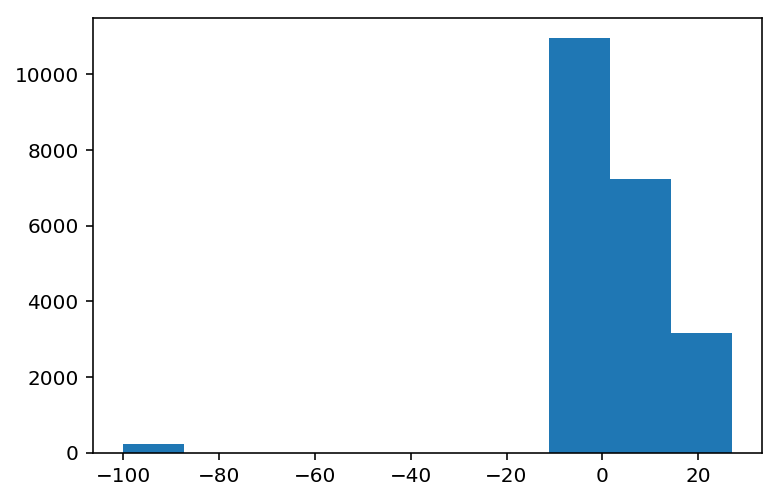

In [76]:
plt.hist(score);

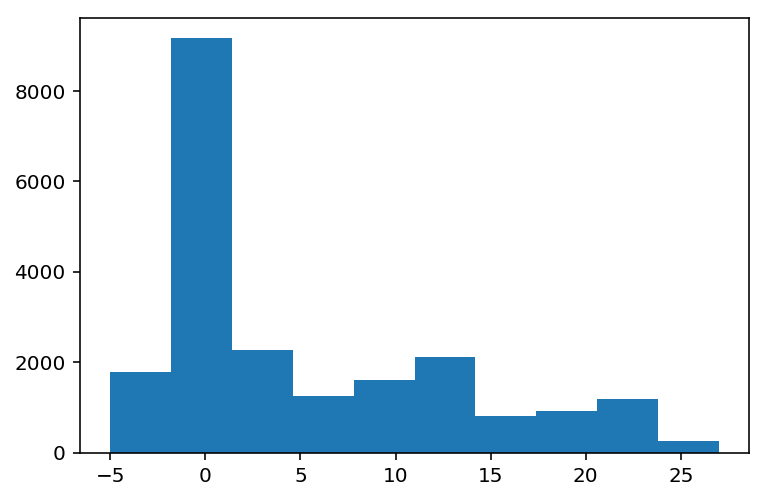

In [77]:
plt.hist(score[score > -20]);

In [79]:
score[score < -20].value_counts()

-100    226
dtype: int64

## nutri-score stats

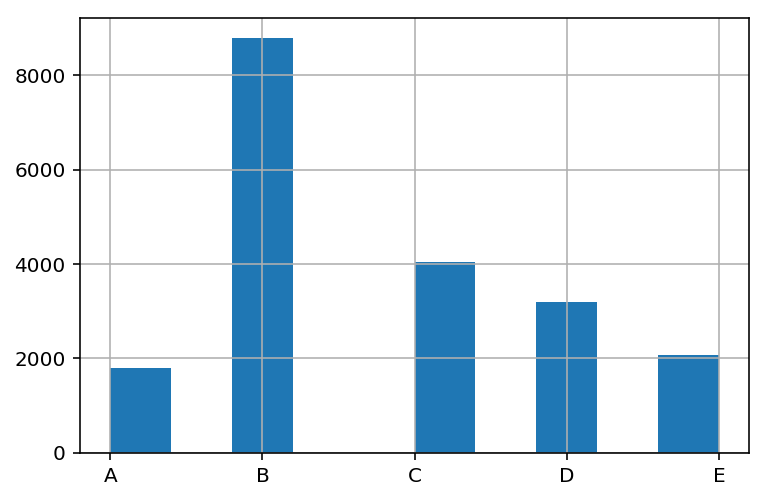

In [84]:
nutriscore.hist();